# Regressione lineare con Numpy Polyfit

In [44]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import statsmodels
print('statsmodels: {}'.format(statsmodels.__version__))
import scipy as sp
import scipy.stats as stats

Python: 3.7.7 (default, May  7 2020, 21:25:33) 
[GCC 7.3.0]
scipy: 1.5.2
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.3
sklearn: 0.23.2
statsmodels: 0.12.0


# Convenzioni per nomi di variabile

a  : Stima Intercetta

b  : Stima slope

s2, s :  varianza e deviazione standard 

se2 : Varianza del modello

se : standard error del modello (deviazione standard del modello) 

u2, u : varianza e deviazione standard(incertezza)  di una stima

U : incertezza estesa 

ub  : std error b (uncertancy b)

ub2 : variance of b

ua : std error a (uncertancy a)

ua2 : variance of a

yfit : yfit=a+b*x

yres : y-yfit  residui

SS Sxx Sxy : Devianza ,  Sum of Square , somma dei quadrati degli scarti dalla media
 - SST = Syy : SumSquareTotal sum[(y-mean(y))^2]
 - SSR = Sum Square Regression = sum[(yfit-mean(y) )^2 ]
 - Sxx = sum[(x-mean(x))^2]
 - Syy = sum[(y-mean(y))^2]

SST = Syy : SumSquareTotal sum[(y-mean(y))^2]

SSR = Sum Square Regression = sum[(yfit-mean(y) )^2 ]

SSE = Sum Square Error = sum[ (y-yfit)^2]=sum[yres^2]

# Intercetta e coefficente angolare
\begin{align}Y = a+bX+ e
\end{align}


```python
import numpy as np
p, cov = np.polyfit(x, y, 1, cov=True)
p[0] Coefficiente angolare
p[1] Intercetta
```

In [45]:
import numpy as np

y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
p, cov = np.polyfit(x, y, 1, cov=True)  # coefficients and covariance matrix
b=p[0]
a=p[1]
print("Coefficiente amgolare (slope) b=  p[0] = {:+8.3f} ".format(p[0]))
print("Intercetta                    a = p[1] = {:+8.3f} ".format(p[1]))

Coefficiente amgolare (slope) b=  p[0] =   +0.110 
Intercetta                    a = p[1] =  +98.248 


# Standard error dello slope e della intercetta 

```python
import numpy as np
p, cov = np.polyfit(x, y, 1, cov=True)  # coefficients and covariance matrix
perr = np.sqrt(np.diag(cov))            # standard errors of slope and intercept
```

In [46]:
import numpy as np

y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
p, cov = np.polyfit(x, y, 1, cov=True)  # coefficients and covariance matrix
perr = np.sqrt(np.diag(cov))       # standard-deviation estimates for each coefficient
ub=perr[0]
ua=perr[1]
print("Slope standard error     perr[0] : {:5.3f} ".format(perr[0]))
print("Intercept standard error perr[1] : {:5.3f} ".format(perr[1]))


Slope standard error     perr[0] : 0.033 
Intercept standard error perr[1] : 58.033 


# Valori stimati e residui
\begin{align}Valori \: stimati : \: \: \: \: \: \: \: \:  Yfit = a+bX
\end{align}


```python
import numpy as np
yfit = np.polyval(p, x)   # evaluate the polynomial at x
resid = y - yfit
```

In [47]:
import numpy as np
y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])

yfit = np.polyval(p, x)  # evaluate the polynomial at x
yresid = y - yfit         # residui
print("Valori stimati  : ")
print(np.round(yfit,1))
print("Residui : ")
print(np.round(yresid,1))

Valori stimati  : 
[251.9 273.9 284.9 304.1 219.  268.4 356.2 367.2 254.7 284.9]
Residui : 
[ -6.9  38.1  -5.9   3.9 -20.  -49.4  48.8 -43.2  64.3 -29.9]


## Devianza totale , devianza della regressione , e devianza degli errori
Devianza : domma dei quadrati degli scarti dalla media : SS (Sum of Square)

\begin{align}
SST=\sum (y_i-\bar{y})^{2}\\
SSR=\sum (y_{fit}-\bar{y})^{2}\\
SSE= \sum (y_i-y_{fit})^{2} = \sum (y_{resid})^{2}
\end{align}

In [48]:
import numpy as np
y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
yfit = np.polyval(p, x)  # evaluate the polynomial at x
resid = y - yfit         # residui

# SST totale aka Syy
SST=np.sum(y**2-np.mean(y)**2)

# SSR Regression
SSR=np.sum(yfit**2-np.mean(y)**2)

# SSE Error 
SSE=np.sum(resid**2)

print("SST Somma dei quadrati totale       (Syy)    {:5.1f}".format(SST))
print("SSR Somma dei quadrati regressione  (Syfit)  {:5.1f}".format(SSR))
print("SSE Somma dei quadrati degli errori (Sy_yfit){:5.1f}".format(SSE))


SST Somma dei quadrati totale       (Syy)    32600.5
SSR Somma dei quadrati regressione  (Syfit)  18934.9
SSE Somma dei quadrati degli errori (Sy_yfit)13665.6


# R<sup>2</sup> Coefficiente of determinazione tra x e y

\begin{align}
R^{2}=
\frac{SSR}{SST}=
\frac{\sum (y_{fit}-\bar{y})^{2}}
{\sum (y_i-\bar{y})^{2}}
\end{align}

```python
import numpy as np
R2 = np.corrcoef(x, y)[0, 1]**2    # coefficient of determination between x and y

```

In [49]:
import numpy as np

y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
R2 = np.corrcoef(x, y)[0, 1]**2    # coefficient of determination between x and y
print("R squared coefficient of determination : {:5.3f}".format(R2))

R squared coefficient of determination : 0.581


# Stimatore della varianza del modello e Standard error

\begin{align}
\hat{\sigma}^{2}=S_{e}^{2}= \frac{\sum e_{i}^{2}}{n-2} \\
\end{align}

\begin{align}
S_{e}= \sqrt{S_{e}^{2} }
\end{align}

In [51]:
import numpy as np
import math
y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
yfit = np.polyval(p, x)  # evaluate the polynomial at x
resid = y - yfit         # residui
# SSE Error 
SSE=np.sum(resid**2)
n =x.size              # number of observations
#Stimatore della varianza del modello
se2=SSE/(n-2)
# Errore standard
s_err=math.sqrt(se2)
print("Stimatore varianza del modello {:8.2f} :".format(se2))
print("Errore standard                {:8.2f} :".format(s_err))


Stimatore varianza del modello  1708.20 :
Errore standard                   41.33 :


# t-Stat

\begin{align}\large
t_{b}=\frac{b-\beta }{s_{b}}=\frac{b-0 }{s_{b}}
\end{align}
```python
import numpy as np
p, cov = np.polyfit(x, y, 1, cov=True)  # coefficients and covariance matrix
perr = np.sqrt(np.diag(cov))       # standard-deviation estimates for each coefficient
tb=p[0]/perr[0]
ta=p[1]/perr[1]
```

In [52]:
import numpy as np

y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
p, cov = np.polyfit(x, y, 1, cov=True)  # coefficients and covariance matrix
perr = np.sqrt(np.diag(cov))       # standard-deviation estimates for each coefficient

print("Coefficiente amgolare (slope) p[0] :{:+5.3f} ".format(p[0]))
print("Intercetta                    p[1] :{:+5.3f} ".format(p[1]))
print("Slope standard error     perr[0] : {:5.3f} ".format(perr[0]))
print("Intercept standard error perr[1] : {:5.3f} ".format(perr[1]))

tb=p[0]/perr[0]
ta=p[1]/perr[1]
print("t-stat slope     tb : {:5.3f}".format(tb))
print("t-stat intercept ta : {:5.3f}".format(ta))

Coefficiente amgolare (slope) p[0] :+0.110 
Intercetta                    p[1] :+98.248 
Slope standard error     perr[0] : 0.033 
Intercept standard error perr[1] : 58.033 
t-stat slope     tb : 3.329
t-stat intercept ta : 1.693


Per confrontare la t-stat ottenuta dobbiamo cercare il punto critico della distribuzone t , per l'intervallo di confidenza desiderato :
```python
import scipy.stats as stats
t = stats.t.interval(alpha, dof,0)  
```

In [53]:
import scipy.stats as stats
# Statistics
n =x.size  # number of observations
m = p.size  # number of parameters : per regressione semplie = 2
dof = n - m # Gradi di liberta : per regressione semplice = n-2                     
# punto critico T-Student (alfa,df)
alpha =0.95 # intervallo di confdenza
t = stats.t.interval(alpha, dof,0)  
print(np.round(t,3))

[-2.306  2.306]


# p-value
Viene calcolata l'area delle due code sulla curva della distribuzione t-Student , esterne a - t-critco e +t-critico

sia per lo slope che per l'intercetta.
```python
import scipy.stats as stats
pvalb=stats.t.sf(tb, dof)*2
pvala=stats.t.sf(ta, dof)*2
```

In [56]:
import numpy as np
import scipy.stats as stats


y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
p, cov = np.polyfit(x, y, 1, cov=True)  # coefficients and covariance matrix
perr = np.sqrt(np.diag(cov))       # standard-deviation estimates for each coefficient
tb=p[0]/perr[0]
ta=p[1]/perr[1]
#Area delle due code
pvalb=stats.t.sf(tb, dof)*2  # oppure stats.t.cdf(-t_stat_b, dof)*2
pvala=stats.t.sf(ta, dof)*2  # oppure stats.t.cdf(-t_stat_a, dof)*2
print("p-value slope b     : {:8.4f}".format(pvalb))
print("p-value intercept a : {:8.4f}".format(pvala))

p-value slope b     :   0.0104
p-value intercept a :   0.1289


# Stima intervalli di confidenza coefficiente angolare e intercetta
\begin{align}
\large \beta=b\pm t_{\alpha /2,df}S_{b}\\
\large \alpha=a\pm t_{\alpha /2,df}S_{a}
\end{align}
```python
import scipy.stats as stats
ta=stats.t.interval(0.95, dof, loc=0, scale=1) 

```

In [185]:
ta=stats.t.interval(0.95, dof, loc=0, scale=1) 

upp95_b=b+ub*ta[1]  
low95_b=b+ub*ta[0]   
upp95_a=a+ua*ta[1]      
low95_a=a+ua*ta[0]  
print("Intervallo di confidenza 95% distribuzione t {:1d} gradi di linerta` :{:2.3f} {:+2.3f}\n"
      .format(dof,ta[0],ta[1]))

print("Intervalli di confidenza 95 %: ")
print("{:12s}|{:10s}|{:10s}|".format(" ","Lower 95%","Upper 95%"))
print("{:12s}|{:10.4f}|{:10.4f}|".format("Intercetta",low95_a,upp95_a))
print("{:12s}|{:10.4f}|{:10.4f}|".format("Slope ",low95_b,upp95_b))


Intervallo di confidenza 95% distribuzione t 8 gradi di linerta` :-2.306 +2.306

Intervalli di confidenza 95 %: 
            |Lower 95% |Upper 95% |
Intercetta  |  -35.5771|  232.0738|
Slope       |    0.0337|    0.1858|


# Plot

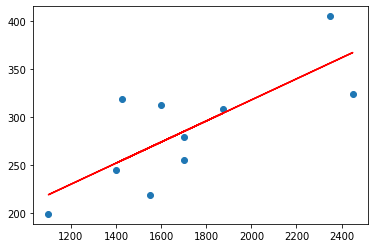

In [212]:
import matplotlib.pyplot as plt

fig ,ax=plt.subplots(1,1,sharey=True)

ax.scatter(x, y)
ax.plot(x,np.polyval([b,a], x),'k-',lw=1.5,c='r')

# Plot bande di confidenza 

\begin{align}
Intervallo\: di\: confidenza\: per\: la\: previsione\: del\: valore\: atteso(ic\:della\:retta\:)\\
\large\hat{y}_{n+1}+t_{\alpha /2,df}S_{e}\sqrt{ \frac{1}{n}+ \frac{ (x_{n+1}-\bar{x})^{2} }{ \sum (x_{i}-\bar{x})^{2} } }
\end{align}

\begin{align}
Intervallo\: di\: confidenza\: per\: la\: previsione\: del\: valore\: osservato \: di\:Y\:in\:corrispondenza\:di\:x_{i}\\
\large\hat{y}_{n+1}+t_{\alpha /2,df}S_{e}\sqrt{ 1+\frac{1}{n}+ \frac{ (x_{n+1}-\bar{x})^{2} }{ \sum (x_{i}-\bar{x})^{2} } }
\end{align}


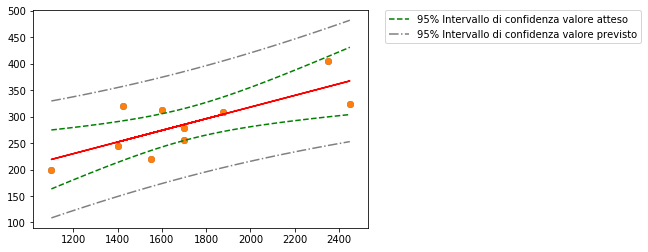

In [240]:
import matplotlib.pyplot as plt

fig ,ax=plt.subplots(1,1,sharey=True)

ax.scatter(x, y)
ax.plot(x,np.polyval([b,a], x),'k-',lw=1.5,c='r')


x2 = np.linspace(np.min(x), np.max(x), 100)
yfit = np.polyval([b,a], x)
y2 = np.linspace(np.min(yfit), np.max(yfit), 100)

# Confidence interval 
ci = t[1] * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
ax.plot(x2, y2 - ci, "--", color="g", label="95% Intervallo di confidenza valore atteso")
ax.plot(x2, y2 + ci, "--", color="g")

# Prediction Interval
pi = t[1] * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))   
ax.plot(x2, y2 - pi, "-.", color="0.5", label="95% Intervallo di confidenza valore previsto")
ax.plot(x2, y2 + pi, "-.", color="0.5")

# Scatter plot
ax.scatter(x, y)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ok=0

# Plot residui

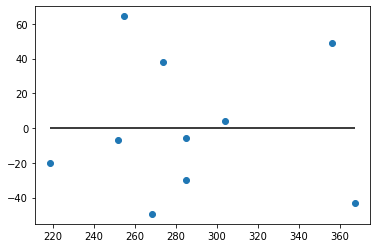

In [250]:
import matplotlib.pyplot as plt
import numpy as np
y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
p, cov = np.polyfit(x, y, 1, cov=True)  # coefficients and covariance matrix

yfit = np.polyval(p, x)  # evaluate the polynomial at x
yresid = y - yfit         # residui
plt.scatter(yfit,yresid)
plt.hlines(xmax=max(yfit),xmin=min(yfit),y=np.mean(yresid))
plt.show()

# Creazione di una classe wrapper

In [61]:
import numpy as np
import math
import scipy.stats as stats

import matplotlib.pyplot as plt

class regression:
    
    def  __init__(self,x,y,alpha=0.95):
        self.x=x
        self.y=y
        p, cov = np.polyfit(x, y, 1, cov=True)  # coefficients and covariance matrix
        self.p=p
        self.cov=cov
        self.b=p[0]
        self.a=p[1]
        
        self.perr = np.sqrt(np.diag(cov))       # standard-deviation estimates for each coefficient
        self.ub=self.perr[0]
        self.ua=self.perr[1]
        self.yfit = np.polyval(p, x)  # evaluate the polynomial at x
        self.yresid = y - self.yfit         # residui 
        # SST totale aka Syy
        self.SST=np.sum(y**2-np.mean(y)**2)
        # SSR Regression
        self.SSR=np.sum(self.yfit**2-np.mean(y)**2)
        # SSE Error 
        self.SSE=np.sum(self.yresid**2)
        self.R2 = np.corrcoef(x, y)[0, 1]**2    # coefficient of determination between x and y
        self.n =x.size              # number of observations
        #Stimatore della varianza del modello
        self.se2=self.SSE/(self.n-2)
        # Errore standard
        self.s_err=math.sqrt(self.se2)
        self.tb=p[0]/self.perr[0]
        self.ta=p[1]/self.perr[1]
        
        # Statistics
        m = p.size  # number of parameters : per regressione semplie = 2
        self.dof = self.n - m # Gradi di liberta : per regressione semplice = n-2                     
   
        self.t = stats.t.interval(alpha, self.dof,0)  

        #Area delle due code
        self.pvalb=stats.t.sf(self.tb, self.dof)*2  # oppure stats.t.cdf(-t_stat_b, dof)*2
        self.pvala=stats.t.sf(self.ta, self.dof)*2  # oppure stats.t.cdf(-t_stat_a, dof)*2

        tsta=stats.t.interval(0.95, self.dof, loc=0, scale=1) 
        self.upp95_b=self.b+self.ub*tsta[1]  
        self.low95_b=self.b+self.ub*tsta[0]   
        self.upp95_a=self.a+self.ua*tsta[1]      
        self.low95_a=self.a+self.ua*tsta[0]  

 
        
    def t_critic(self,alpha=0.95):
        # punto critico T-Student (alfa,df)
        self.t = stats.t.interval(alpha, self.dof,0)  
       
  
    def summary(self):
        print("Coefficiente amgolare (slope) b=  p[0] = {:+8.3f} ".format(self.p[0]))
        print("Intercetta                    a = p[1] = {:+8.3f} ".format(self.p[1]))
        print("SST Somma dei quadrati totale       (Syy)    {:5.1f}".format(self.SST))
        print("SSR Somma dei quadrati regressione  (Syfit)  {:5.1f}".format(self.SSR))
        print("SSE Somma dei quadrati degli errori (Sy_yfit){:5.1f}".format(self.SSE))
        print("R squared coefficient of determination : {:5.3f}".format(self.R2))
        print("Stimatore varianza del modello {:8.2f} :".format(self.se2))
        print("Errore standard                {:8.2f} :".format(self.s_err))
        print("t-stat slope     tb : {:5.3f}".format(self.tb))
        print("t-stat intercept ta : {:5.3f}".format(self.ta))
        print("p-value slope b     : {:8.4f}".format(self.pvalb))
        print("p-value intercept a : {:8.4f}".format(self.pvala))
        print("Intervalli di confidenza 95 %: ")
        print("{:12s}|{:10s}|{:10s}|".format(" ","Lower 95%","Upper 95%"))
        print("{:12s}|{:10.4f}|{:10.4f}|".format("Intercetta",self.low95_a,self.upp95_a))
        print("{:12s}|{:10.4f}|{:10.4f}|".format("Slope ",self.low95_b,self.upp95_b))

        
    def plot_regr(self):
        fig ,ax=plt.subplots(1,1,sharey=True)
        ax.scatter(self.x, self.y)
        ax.plot(self.x,np.polyval([self.b,self.a], self.x) ,'k-',lw=1.5,c='r')
        
    def plot_residual(self):
        plt.scatter(self.yfit,self.yresid)
        plt.hlines(xmax=max(self.yfit),xmin=min(self.yfit),y=np.mean(self.yresid))
        plt.show()
        
    def plot_confidencebands(self):
        fig ,ax=plt.subplots(1,1,sharey=True)
        ax.scatter(self.x, self.y)
        ax.plot(self.x,np.polyval([self.b,self.a], self.x),'k-',lw=1.5,c='r')
        x2 = np.linspace(np.min(self.x), np.max(self.x), 100)
        yfit = np.polyval([self.b,self.a], self.x)
        xmin=np.min(self.x)
        xmax=np.max(self.x)
        y2 = np.linspace((self.a+xmin*self.b),(self.a+xmax*self.b), 100)        # Confidence interval 
        ci = self.t[1] * self.s_err * np.sqrt(1/self.n + (x2 - np.mean(self.x))**2 / np.sum((self.x - np.mean(self.x))**2))
        ax.plot(x2, y2 - ci, "--", color="g", label="95% Intervallo di confidenza valore atteso")
        ax.plot(x2, y2 + ci, "--", color="g")
        # Prediction Interval
        pi = self.t[1] * self.s_err * np.sqrt(1 + 1/self.n + (x2 - np.mean(self.x))**2 / np.sum((self.x - np.mean(self.x))**2))   
        ax.plot(x2, y2 - pi, "-.", color="0.5", label="95% Intervallo di confidenza valore previsto")
        ax.plot(x2, y2 + pi, "-.", color="0.5")
        # Scatter plot
        ax.scatter(self.x, self.y)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [62]:
y=np.array([245, 312,279,308,199,219,405,324,319,255])
x=np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
myreg=regression(x,y)
myreg.summary()

Coefficiente amgolare (slope) b=  p[0] =   +0.110 
Intercetta                    a = p[1] =  +98.248 
SST Somma dei quadrati totale       (Syy)    32600.5
SSR Somma dei quadrati regressione  (Syfit)  18934.9
SSE Somma dei quadrati degli errori (Sy_yfit)13665.6
R squared coefficient of determination : 0.581
Stimatore varianza del modello  1708.20 :
Errore standard                   41.33 :
t-stat slope     tb : 3.329
t-stat intercept ta : 1.693
p-value slope b     :   0.0104
p-value intercept a :   0.1289
Intervalli di confidenza 95 %: 
            |Lower 95% |Upper 95% |
Intercetta  |  -35.5771|  232.0738|
Slope       |    0.0337|    0.1858|


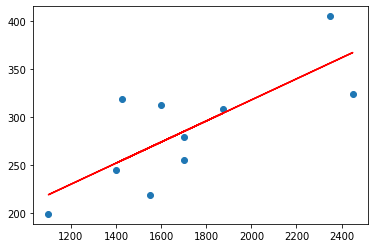

In [63]:
myreg.plot_regr()

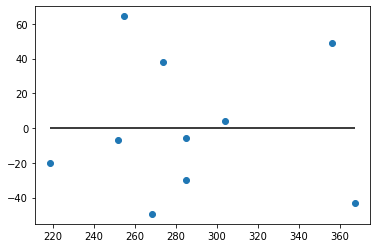

In [64]:
myreg.plot_residual()

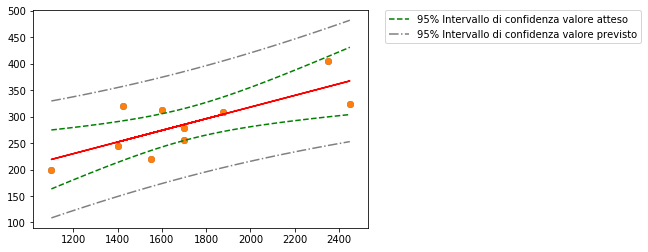

In [65]:
myreg.plot_confidencebands()

### Links utili e di riferimento

https://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot